In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
path_to_data = '../data/preprocess.csv'
data = pd.read_csv(path_to_data)
data.utc_event_time = pd.to_datetime(data.utc_event_time)
data.utc_event_date = pd.to_datetime(data.utc_event_date)
data

,utc_event_time,utc_event_date,user_id,city_name,event_action,id,brand,variant,currency,price100,qty,grand_total100,os_manufacturer,device_type,traffic_src_kind,app_version,net_type,locale
0,2021-10-01 19:40:22,2021-10-01,11090758688966051676,Могилёв,view_item,BEFC96A9D6DEA3A9817BC5E5157B0A1C,6B0630D20C913739C8164D8208A1B13D,3B9A6121A509CBADC049AEABD3ED0223,RUB,231100,1,231100,Xiaomi,smartphone,mobile,4.3.4000,Wi-Fi,ru
1,2021-10-01 19:40:22,2021-10-01,11090758688966051676,Могилёв,add_to_cart,BEFC96A9D6DEA3A9817BC5E5157B0A1C,6B0630D20C913739C8164D8208A1B13D,3B9A6121A509CBADC049AEABD3ED0223,RUB,248500,1,248500,Xiaomi,smartphone,mobile,4.3.4000,Wi-Fi,ru
2,2021-10-01 07:50:59,2021-10-01,12487687213536341095,Самара,view_item,97F9B1135CF24F4CFFF4664435AEC2B9,FA74FF059207A1569295D3E83CA88E53,3B9A6121A509CBADC049AEABD3ED0223,RUB,75400,1,75400,samsung,smartphone,mobile,4.2.7000,3G,ru
3,2021-10-02 11:51:12,2021-10-02,12487687213536341095,Самара,view_item,97F9B1135CF24F4CFFF4664435AEC2B9,FA74FF059207A1569295D3E83CA88E53,3B9A6121A509CBADC049AEABD3ED0223,RUB,74500,1,74500,samsung,smartphone,mobile,4.2.7000,3G,ru
4,2021-10-03 15:06:38,2021-10-03,10383386994170804641,Москва,view_item,7D9A98C6E8BF033613B74252D9D24B33,681425F1391C8CA4026B28066C7B3B4A,3B9A6121A509CBADC049AEABD3ED0223,RUB,131900,1,131900,samsung,smartphone,mobile,4.3.1003,4G,ru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450082,2021-10-10 11:13:11,2021-10-10,13331229260693292116,Екатеринбург,begin_checkout,8360E6D158AEBD26BBBE835C38F88748,54C53BB4CEB1938D929A930E4FFC4BE5,43FCC4D7C1455DAAD680C4F142A539FB,RUB,1382400,1,1382400,samsung,smartphone,mobile,4.2.9000,2G,ru
3450083,2021-10-10 12:10:52,2021-10-10,13331229260693292116,Екатеринбург,begin_checkout,8360E6D158AEBD26BBBE835C38F88748,54C53BB4CEB1938D929A930E4FFC4BE5,43FCC4D7C1455DAAD680C4F142A539FB,RUB,1382400,1,1382400,samsung,smartphone,mobile,4.2.9000,2G,ru
3450084,2021-10-10 11:39:28,2021-10-10,10985970864871842613,Москва,view_item,BDBD23C5359EF7B3F85763C032892B85,0B1BC368C77D7A9B58F26B087958C231,3B9A6121A509CBADC049AEABD3ED0223,RUB,2309200,1,2309200,HUAWEI,smartphone,mobile,4.2.5000-huawei,4G,ru
3450085,2021-10-10 11:02:27,2021-10-10,12409157986873686868,Москва,view_item,97F9B1135CF24F4CFFF4664435AEC2B9,FA74FF059207A1569295D3E83CA88E53,3B9A6121A509CBADC049AEABD3ED0223,RUB,74900,1,74900,samsung,smartphone,mobile,4.3.1003,Wi-Fi,ru


In [3]:
events = set([event for event in data['event_action']])
events

{'add_to_cart',
 'begin_checkout',
 'purchase',
 'remove_from_cart',
 'view_item',
 'view_item_list'}

In [4]:
for col in ['id', 'brand', 'variant', 'price100', 'user_id']:
    print(col, 'unique values:', data[col].unique().shape[0])

id unique values: 260335
brand unique values: 44576
variant unique values: 1001
price100 unique values: 13120
user_id unique values: 1237662


In [5]:
# users_cummulative = pd.DataFrame({}, columns=['user_id', 'purchase_count'])
# group_user = data[data.event_action == 'purchase'].groupby('user_id').agg()
# group_user

In [6]:
from itertools import combinations

In [43]:
def get_dict_conversions(df):
    
    def func(df):
        series = df.event_action.value_counts()
        return pd.Series(
            {f'{i}/{j}': series.loc[i] / series.loc[j] 
             for i, j in combinations(series.index.unique(), 2)},
            name='count')

    actions_count = df.groupby('utc_event_date').apply(func)
    actions_count = actions_count.reset_index().rename(columns={'level_1': 'conversion'}).set_index('utc_event_date')
    for i, df in actions_count.groupby('conversion'):
        yield (i, df['count'].to_dict())

actions_count = list(get_dict_conversions(data))
# plt.figure(figsize=(10, 10))
# sns.lineplot(data=actions_count, x='utc_event_date', y='count', hue='conversion')

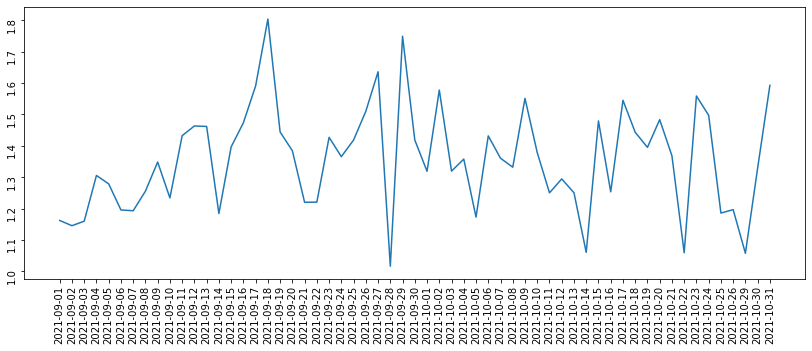

In [58]:
plt.figure(figsize=(14, 5))
g = sns.lineplot(data=pd.Series(actions_count[0][1]))
g.tick_params(rotation=90)

In [25]:
to_json = actions_count.set_index('conversion')
    

AttributeError: 'DataFrameGroupBy' object has no attribute 'to_dict'

In [68]:
def conversion(df):
    df = df.set_index('event_action')
    return pd.Series({f'{i}/{j}': df.loc[i, 'count'] / df.loc[j, 'count'] for i, j in combinations(df.index.unique(), 2)},
                    name='count')

In [75]:
convers = actions_count.groupby('utc_event_date').apply(conversion).reset_index().rename(columns={'level_1': 'conversion'})
convers

,utc_event_date,conversion,count
0,2021-09-01,view_item/begin_checkout,1.799805
1,2021-09-01,view_item/add_to_cart,7.575221
2,2021-09-01,view_item/purchase,8.802057
3,2021-09-01,begin_checkout/add_to_cart,4.208913
4,2021-09-01,begin_checkout/purchase,4.890562
...,...,...,...
433,2021-10-31,begin_checkout/purchase,3.560887
434,2021-10-31,begin_checkout/remove_from_cart,7.138526
435,2021-10-31,add_to_cart/purchase,1.592699
436,2021-10-31,add_to_cart/remove_from_cart,3.192891


<AxesSubplot:xlabel='utc_event_date', ylabel='count'>

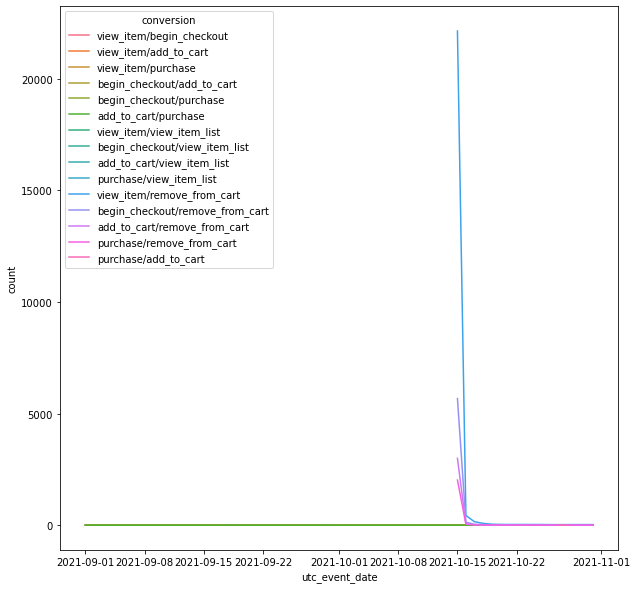

In [76]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=convers, x='utc_event_date', y='count', hue='conversion')